<a href="https://colab.research.google.com/github/AnandaIlyasa/bangkit-capstone-bahanbaku/blob/main/food_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf

import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import callbacks
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import models
from tensorflow.keras.applications.efficientnet import preprocess_input

import cv2
import os
import random
import collections
from collections import defaultdict

from shutil import copy
from shutil import copytree, rmtree

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

In [ ]:
# Clone tensorflow/examples repo which has images to evaluate trained model
!git clone https://github.com/tensorflow/examples.git

Cloning into 'examples'...
remote: Enumerating objects: 21357, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 21357 (delta 4), reused 10 (delta 4), pack-reused 21339
Receiving objects: 100% (21357/21357), 35.57 MiB | 22.01 MiB/s, done.
Resolving deltas: 100% (11760/11760), done.


In [ ]:
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    tf.keras.utils.get_file(
    'food-101.tar.gz',
    'http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz',
    cache_subdir='/content',
    extract=True,
    archive_format='tar',
    cache_dir=None
    )
    print("Dataset downloaded and extracted!")

In [ ]:
get_data_extract()

4996292608/4996278331 [==============================] - 207s 0us/step
Dataset downloaded and extracted!


In [ ]:
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))

In [ ]:
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [ ]:
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'food-101/train')

Creating train data...
Copying Done!


In [ ]:
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'food-101/test')

Creating test data...
Copying Done!


In [ ]:
# train_files = sum([len(files) for i, j, files in os.walk("food-101/train")])
# print("Total number of samples in train folder")
# print(train_files)

Total number of samples in train folder
75750


In [ ]:
# test_files = sum([len(files) for i, j, files in os.walk("food-101/test")])
# print("Total number of samples in test folder")
# print(test_files)

Total number of samples in test folder
25250


In [ ]:
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

In [ ]:
food_list = ["apple_pie","bakso","bibimbap","bread_pudding","cheesecake","chicken_curry","chicken_wings","chocolate_cake","french_fries","gado","garlic_bread","gnocchi","gudeg","hamburger","omelette","pizza","rendang","samosa","sate","shrimp_and_grits","strawberry_shortcake","tacos","tiramisu","tuna_tartare","waffles"]
# food_list = ["apple_pie","baklava","bibimbap","bread_pudding","cheesecake","chicken_curry","chicken_wings","chocolate_cake","donuts","french_fries","fried_rice","garlic_bread","gnocchi","hamburger","hot_dog","lasagna","nachos","omelette","pancakes","panna_cotta","pizza","ramen","ravioli","red_velvet_cake","risotto","samosa","sashimi","shrimp_and_grits","steak","strawberry_shortcake","sushi","tacos","tiramisu","tuna_tartare","waffles"]
src_train = 'food-101/train'
dest_train = 'food-101/train_mini'
src_test = 'food-101/test'
dest_test = 'food-101/test_mini'

In [ ]:
# food_list.sort()
# print("\"",end="")
# for food in food_list:
#   print(food, end="\",\"")
# print()
# print(len(food_list))

"apple_pie","bakso","bibimbap","bread_pudding","cheesecake","chicken_curry","chicken_wings","chocolate_cake","french_fries","gado","garlic_bread","gnocchi","gudeg","hamburger","omelette","pizza","rendang","samosa","sate","shrimp_and_grits","strawberry_shortcake","tacos","tiramisu","tuna_tartare","waffles","
25


In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d theresalusiana/indonesian-food

 99% 669M/673M [00:05<00:00, 140MB/s]
100% 673M/673M [00:05<00:00, 128MB/s]


In [ ]:
! unzip /content/indonesian-food.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/gado/gado gado-21411.jpg  
  inflating: dataset/train/gado/gado gado-21412.jpg  
  inflating: dataset/train/gado/gado gado-21413.jpg  
  inflating: dataset/train/gado/gado gado-21414.jpg  
  inflating: dataset/train/gado/gado gado-21415.jpg  
  inflating: dataset/train/gado/gado gado-21416.jpg  
  inflating: dataset/train/gado/gado gado-21417.jpg  
  inflating: dataset/train/gado/gado gado-21418.jpg  
  inflating: dataset/train/gado/gado gado-21419.jpg  
  inflating: dataset/train/gado/gado gado-21420.jpg  
  inflating: dataset/train/gado/gado gado-21421.jpg  
  inflating: dataset/train/gado/gado gado-21422.jpg  
  inflating: dataset/train/gado/gado gado-21423.jpg  
  inflating: dataset/train/gado/gado gado-21424.jpg  
  inflating: dataset/train/gado/gado gado-21425.jpg  
  inflating: dataset/train/gado/gado gado-21426.jpg  
  inflating: dataset/train/gado/gado gado-21427.jpg  
  inflating: dataset/train/gado

In [ ]:
! cp -a /content/dataset/train/. /content/food-101/train

In [ ]:
! cp -a /content/dataset/valid/. /content/food-101/train

In [ ]:
! cp -a /content/dataset/test/. /content/food-101/test

In [ ]:
# !ls -l /content/food-101/images/bakso | wc -l

ls: cannot access '/content/food-101/images/bakso': No such file or directory
0


In [ ]:
dataset_mini(food_list, src_train, dest_train)
train_files = sum([len(files) for i, j, files in os.walk("food-101/train_mini")])
print(train_files)

Copying images into apple_pie
Copying images into bakso
Copying images into bibimbap
Copying images into bread_pudding
Copying images into cheesecake
Copying images into chicken_curry
Copying images into chicken_wings
Copying images into chocolate_cake
Copying images into french_fries
Copying images into gado
Copying images into garlic_bread
Copying images into gnocchi
Copying images into gudeg
Copying images into hamburger
Copying images into omelette
Copying images into pizza
Copying images into rendang
Copying images into samosa
Copying images into sate
Copying images into shrimp_and_grits
Copying images into strawberry_shortcake
Copying images into tacos
Copying images into tiramisu
Copying images into tuna_tartare
Copying images into waffles
23176


In [ ]:
dataset_mini(food_list, src_test, dest_test)
test_files = sum([len(files) for i, j, files in os.walk("food-101/test_mini")])
print(test_files)

Copying images into apple_pie
Copying images into bakso
Copying images into bibimbap
Copying images into bread_pudding
Copying images into cheesecake
Copying images into chicken_curry
Copying images into chicken_wings
Copying images into chocolate_cake
Copying images into french_fries
Copying images into gado
Copying images into garlic_bread
Copying images into gnocchi
Copying images into gudeg
Copying images into hamburger
Copying images into omelette
Copying images into pizza
Copying images into rendang
Copying images into samosa
Copying images into sate
Copying images into shrimp_and_grits
Copying images into strawberry_shortcake
Copying images into tacos
Copying images into tiramisu
Copying images into tuna_tartare
Copying images into waffles
5913


In [ ]:
# n_classes,num_epochs, nb_train_samples,nb_validation_samples = 25, 2, train_files, test_files
def prepare_data():
  K.clear_session()

  img_width, img_height = 300, 300
  train_data_dir = 'food-101/train_mini'
  validation_data_dir = 'food-101/test_mini'
  batch_size = 10

  train_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input,
      shear_range=0.2,
      validation_split=0.85,
      zoom_range=0.2,
      horizontal_flip=True)

  test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.85)

  train_generator = train_datagen.flow_from_directory(
      train_data_dir,
      target_size=(img_height, img_width),
      batch_size=batch_size,
      subset='training',
      class_mode='categorical')

  validation_generator = test_datagen.flow_from_directory(
      validation_data_dir,
      target_size=(img_height, img_width),
      batch_size=batch_size,
      subset='training',
      class_mode='categorical')
  
  return train_generator, validation_generator

In [ ]:
# for layer in inception.layers:
#   layer.trainable = False
# last_layer = inception.get_layer('mixed7')
# last_output = last_layer.output
def prepare_model(n_classes, nb_train_samples,nb_validation_samples):
  # bestmodel_path = 'bestmodel_'+str(n_classes)+'class.hdf5'

  efficient_net = EfficientNetB7(weights='imagenet', include_top=False, classes=n_classes)
  for layer in efficient_net.layers:
    layer.trainable = False
  last_layer = efficient_net.get_layer('block4i_project_conv')
  last_output = last_layer.output

  x = last_output
  x = GlobalAveragePooling2D()(x)
  x = Dense(1024, activation='relu')(x)
  x = Dropout(0.3)(x)               
  x = Dense(n_classes, activation='softmax')(x) 
  model = Model(efficient_net.input, x)

  optimizer = Adam(learning_rate=0.001)

  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
n_classes=25

train_generator, validation_generator = prepare_data()

model = prepare_model(n_classes, train_files, test_files)

checkpoint = callbacks.ModelCheckpoint('checkpoint_'+str(n_classes), save_best_only=True)

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=2,
                    verbose=1,
                    callbacks=[checkpoint])

# model.save_weights('weights')
# class_map = train_generator.class_indices

Found 3489 images belonging to 25 classes.
Found 901 images belonging to 25 classes.
258088960/258076736 [==============================] - 2s 0us/step
Epoch 1/2
349/349 [==============================] - 238s 618ms/step - loss: 2.6723 - accuracy: 0.2224 - val_loss: 2.6086 - val_accuracy: 0.2064
Epoch 2/2
349/349 [==============================] - 210s 601ms/step - loss: 2.2083 - accuracy: 0.3328 - val_loss: 2.3811 - val_accuracy: 0.2619


In [ ]:
# continue training
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/25_classes')
new_history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=1,
                    verbose=1,
                    callbacks=[checkpoint])

349/349 [==============================] - 210s 603ms/step - loss: 1.8443 - accuracy: 0.4348 - val_loss: 2.0751 - val_accuracy: 0.3585


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# model.save('/content/drive/MyDrive/Colab Notebooks/25_classes')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/25_classes/assets


In [ ]:
!cp -r $(pwd)/checkpoint_25 /content/drive/MyDrive/Colab\ Notebooks

# Visualize the accuracy and loss plots

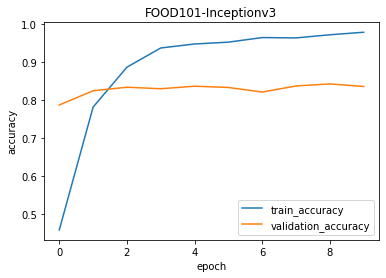

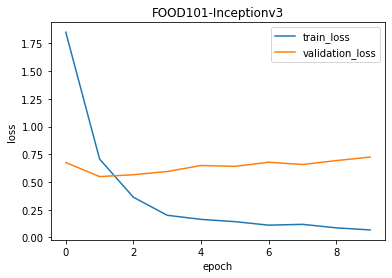

In [ ]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy']) # change acc to accuracy if testing TF 2.0
    plt.plot(history.history['val_accuracy']) # change val_accuracy if testing TF 2.0
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()


def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

plot_accuracy(history,'FOOD101-Inceptionv3')
plot_loss(history,'FOOD101-Inceptionv3')

# Predicting classes for new images from internet using the best trained model

In [ ]:
%%time
# Loading the best saved model to make predictions

K.clear_session()
model_best = load_model('/content/drive/MyDrive/Colab Notebooks/trainedmodel_20class.hdf5',compile = False)

CPU times: user 6.3 s, sys: 884 ms, total: 7.18 s
Wall time: 12.3 s


In [ ]:
!cp trainedmodel_20class.hdf5 drive/MyDrive/Colab\ Notebooks

In [ ]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img = preprocess_input(img)                                      

    pred = model.predict(img)
    print(pred)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    #print(pred)
    if show:
        plt.imshow(img[0].astype(np.uint8))                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()
  

[[9.9899012e-01 7.9092566e-11 9.8707422e-04 2.9439708e-09 9.0668200e-06
  1.4045784e-08 2.6680461e-08 7.5342121e-10 4.4109605e-09 2.7723728e-11
  1.9050109e-06 6.6321705e-11 3.3043845e-11 1.1753968e-05 7.7522594e-10
  6.0014149e-10 7.3544018e-11 5.6105205e-09 3.6861617e-10 7.2847719e-09]]


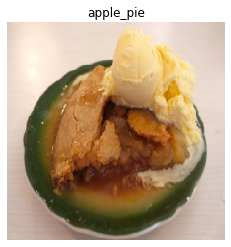

[[5.3036050e-08 1.4054989e-10 1.4927696e-06 9.9998713e-01 3.9210701e-10
  1.5727350e-12 2.6381231e-09 4.0666796e-11 1.5720985e-09 1.4426407e-10
  6.7791384e-10 4.8514986e-10 3.4537435e-11 2.3686804e-09 1.2440705e-10
  1.1316202e-05 5.1031505e-12 9.1139274e-10 1.0114540e-08 1.5153945e-09]]


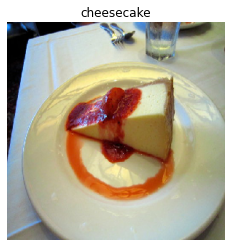

[[1.47429263e-10 1.61149028e-11 1.96339556e-06 4.41391681e-14
  9.33359390e-10 9.99997854e-01 4.76323425e-10 8.08113854e-11
  6.06687423e-10 7.25449076e-11 1.24261351e-10 1.08446786e-10
  2.70385103e-10 1.80309783e-07 2.08426627e-11 1.10962706e-09
  1.15017206e-11 2.64461397e-10 1.14647118e-10 6.40921938e-09]]


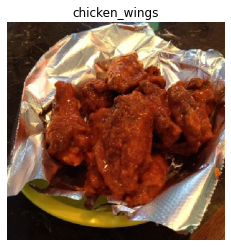

In [ ]:
# Make a list of images and test the trained model
images = []
images.append('/content/food-101/images/apple_pie/1038694.jpg')
images.append('/content/food-101/images/cheesecake/102854.jpg')
images.append('/content/food-101/images/chicken_wings/1021138.jpg')
predict_class(model_best, images, True)